# Set 2 Round 2 of experiments
## Evaluating Inception emotion features

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from matplotlib.image import imread 
import PIL
from PIL import Image
from sklearn import svm
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import h5py
from pickle import dump

In [2]:

'''
loading Inception training emotion features 

'''

'\nloading Inception training emotion features \n\n'

In [3]:
training = sorted(glob.glob(r'data/all_features/mid-level/IV3-emo/*.csv'))
training_labels = pd.read_csv('data/MotionEmotion/reduced_emo_labelled_dataset.csv')
training_labels

,Unnamed: 0,path,label
0,0,data/MotionEmotion/Motion_Emotion_Dataset/vide...,6
1,1,data/MotionEmotion/Motion_Emotion_Dataset/vide...,6
2,2,data/MotionEmotion/Motion_Emotion_Dataset/vide...,6
3,3,data/MotionEmotion/Motion_Emotion_Dataset/vide...,6
4,4,data/MotionEmotion/Motion_Emotion_Dataset/vide...,6
...,...,...,...
4867,43773,data/MotionEmotion/Motion_Emotion_Dataset/vide...,1
4868,43774,data/MotionEmotion/Motion_Emotion_Dataset/vide...,1
4869,43775,data/MotionEmotion/Motion_Emotion_Dataset/vide...,1
4870,43776,data/MotionEmotion/Motion_Emotion_Dataset/vide...,1


In [4]:
from natsort import natsorted 
#this works!
sorted_array = natsorted(training, key=lambda x:(x[29].isdigit(), x))
#sorted_array

In [5]:
training_df = pd.DataFrame()
training_df['path'] = sorted_array
training_df['label'] = training_labels['label']
 

In [6]:
neutral = training_df[training_df['label'] == 6].sample(n=650)
neutral_ = training_df[training_df['label']== 6].index
training_df.drop(neutral_, inplace=True)
training_df

,path,label
56,data/all_features/mid-level/IV3-emo/data57.csv,3
57,data/all_features/mid-level/IV3-emo/data58.csv,3
58,data/all_features/mid-level/IV3-emo/data59.csv,3
59,data/all_features/mid-level/IV3-emo/data60.csv,3
60,data/all_features/mid-level/IV3-emo/data61.csv,3
...,...,...
4867,data/all_features/mid-level/IV3-emo/data4868.csv,1
4868,data/all_features/mid-level/IV3-emo/data4869.csv,1
4869,data/all_features/mid-level/IV3-emo/data4870.csv,1
4870,data/all_features/mid-level/IV3-emo/data4871.csv,1


In [7]:
train = pd.concat((training_df,neutral))
train

,path,label
56,data/all_features/mid-level/IV3-emo/data57.csv,3
57,data/all_features/mid-level/IV3-emo/data58.csv,3
58,data/all_features/mid-level/IV3-emo/data59.csv,3
59,data/all_features/mid-level/IV3-emo/data60.csv,3
60,data/all_features/mid-level/IV3-emo/data61.csv,3
...,...,...
220,data/all_features/mid-level/IV3-emo/data221.csv,6
174,data/all_features/mid-level/IV3-emo/data175.csv,6
2091,data/all_features/mid-level/IV3-emo/data2092.csv,6
2225,data/all_features/mid-level/IV3-emo/data2226.csv,6


In [8]:
train_features = [ ]
for i in train.path:    
    with open(i) as file_name:
        array = np.loadtxt(file_name, delimiter=",")
        train_features.append(array)
    #print(array)

In [9]:
train_labels = train.label

In [10]:
'''
loading testing features
'''

'\nloading testing features\n'

In [11]:
testing_emo_ = pd.read_csv('data/MotionEmotion/test_set.csv')
testing_emo_

,Unnamed: 0.1,Unnamed: 0,test_path,test_labels
0,35484,35484,data/MotionEmotion/Motion_Emotion_Dataset/vide...,1
1,15885,15885,data/MotionEmotion/Motion_Emotion_Dataset/vide...,1
2,17497,17497,data/MotionEmotion/Motion_Emotion_Dataset/vide...,1
3,13773,13773,data/MotionEmotion/Motion_Emotion_Dataset/vide...,1
4,11741,11741,data/MotionEmotion/Motion_Emotion_Dataset/vide...,1
...,...,...,...,...
1195,13638,13638,data/MotionEmotion/Motion_Emotion_Dataset/vide...,6
1196,13543,13543,data/MotionEmotion/Motion_Emotion_Dataset/vide...,6
1197,26468,26468,data/MotionEmotion/Motion_Emotion_Dataset/vide...,6
1198,15519,15519,data/MotionEmotion/Motion_Emotion_Dataset/vide...,6


In [12]:
test_labels = testing_emo_.test_labels 

In [13]:
testing_ = sorted(glob.glob(r'data/all_features/IV3_test_features/*.csv'))

In [14]:
from natsort import natsorted 
#this works!
test_features = natsorted(testing_, key=lambda x:(x[29].isdigit(), x))
#sorted_array

In [15]:
test_features

['data/all_features/IV3_test_features/data1.csv',
 'data/all_features/IV3_test_features/data2.csv',
 'data/all_features/IV3_test_features/data3.csv',
 'data/all_features/IV3_test_features/data4.csv',
 'data/all_features/IV3_test_features/data5.csv',
 'data/all_features/IV3_test_features/data6.csv',
 'data/all_features/IV3_test_features/data7.csv',
 'data/all_features/IV3_test_features/data8.csv',
 'data/all_features/IV3_test_features/data9.csv',
 'data/all_features/IV3_test_features/data10.csv',
 'data/all_features/IV3_test_features/data11.csv',
 'data/all_features/IV3_test_features/data12.csv',
 'data/all_features/IV3_test_features/data13.csv',
 'data/all_features/IV3_test_features/data14.csv',
 'data/all_features/IV3_test_features/data15.csv',
 'data/all_features/IV3_test_features/data16.csv',
 'data/all_features/IV3_test_features/data17.csv',
 'data/all_features/IV3_test_features/data18.csv',
 'data/all_features/IV3_test_features/data19.csv',
 'data/all_features/IV3_test_features/da

In [16]:
testing = pd.DataFrame()
testing['path'] = test_features
testing['label'] = test_labels

In [17]:
test_features = [ ]
for i_ in testing.path:    
    with open(i_) as file_name_:
        array_ = np.loadtxt(file_name_, delimiter=",")
        test_features.append(array_)
    #print(array)

In [32]:
test_features[1].shape

(24576,)

In [19]:
test_labels_ = testing.label

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import scipy
from sklearn.metrics import classification_report


In [27]:
linear = svm.SVC(kernel='linear', decision_function_shape='ovo').fit(train_features, train_labels)


Accuracy Linear Kernel: 0.5008333333333334
              precision    recall  f1-score   support

           1       0.51      0.42      0.46       200
           2       0.98      0.28      0.44       200
           3       0.58      0.37      0.45       200
           4       0.72      0.70      0.71       200
           5       0.96      0.40      0.57       200
           6       0.29      0.83      0.43       200

    accuracy                           0.50      1200
   macro avg       0.67      0.50      0.51      1200
weighted avg       0.67      0.50      0.51      1200



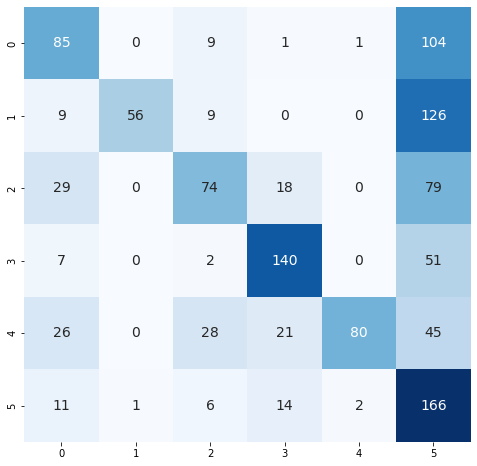

In [28]:
linear_pred = linear.predict(test_features)
accuracy_lin = linear.score(test_features, test_labels_)
import seaborn as sns
import matplotlib.pyplot as plt
cm_lin = confusion_matrix(test_labels_, linear_pred)
print('Accuracy Linear Kernel:', accuracy_lin)
fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
ax = sns.heatmap(cm_lin, annot=True, cmap='Blues',annot_kws={"size": 14}, fmt='g',cbar=False)
print(classification_report(test_labels_, linear_pred))


In [29]:
poly = svm.SVC(kernel='poly', degree=1, C=3, decision_function_shape='ovo').fit(train_features, train_labels)


Accuracy Polynomial Kernel: 0.5
              precision    recall  f1-score   support

           1       0.51      0.42      0.46       200
           2       0.98      0.28      0.44       200
           3       0.59      0.37      0.46       200
           4       0.72      0.69      0.71       200
           5       0.96      0.40      0.57       200
           6       0.29      0.83      0.43       200

    accuracy                           0.50      1200
   macro avg       0.68      0.50      0.51      1200
weighted avg       0.68      0.50      0.51      1200



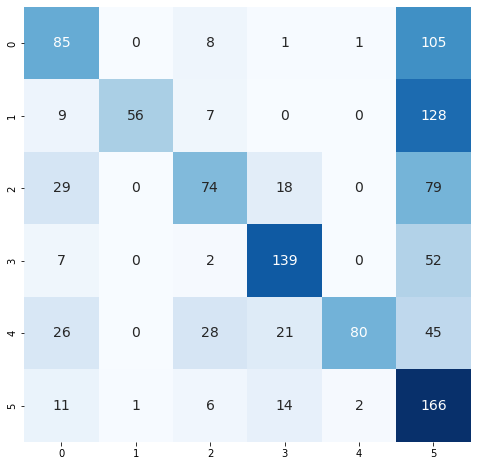

In [30]:
poly_pred = poly.predict(test_features)
accuracy_poly = poly.score(test_features, test_labels_)
print('Accuracy Polynomial Kernel:', accuracy_poly)
fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
cm_poly = confusion_matrix(test_labels_, poly_pred)
ax = sns.heatmap(cm_poly, annot=True, cmap='Blues',annot_kws={"size": 14}, fmt='g',cbar=False)
print(classification_report(test_labels_, poly_pred))
